In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

Data Generation
===

In [2]:
np.random.seed(10)
p, q = (np.random.rand(i, 2) for i in (4, 5))
p_big, q_big = (np.random.rand(i, 80) for i in (100, 120))

print(p, "\n\n", q)

[[ 0.77132064  0.02075195]
 [ 0.63364823  0.74880388]
 [ 0.49850701  0.22479665]
 [ 0.19806286  0.76053071]] 

 [[ 0.16911084  0.08833981]
 [ 0.68535982  0.95339335]
 [ 0.00394827  0.51219226]
 [ 0.81262096  0.61252607]
 [ 0.72175532  0.29187607]]


Solution
===

In [4]:
def naive(p, q):
    pR, pQ = p.shape
    qR, qQ = q.shape
    for i in range(pR):
        for j in range(qR):
            print(np.linalg.norm(p[i]-q[j]))

naive(p,q)

0.60599073488
0.936594489899
0.911248564959
0.593213555481
0.275617505479
0.807469987107
0.211023544898
0.672686486241
0.224950838999
0.465344910288
0.356542153772
0.752174928692
0.572000519565
0.499000678673
0.233108246711
0.672814107554
0.52407472424
0.315202256469
0.632128965882
0.702773761857


### Use matching indices

Instead of iterating through indices, one can use them directly to parallelize the operations with Numpy.

In [73]:
rows, cols = np.indices((p.shape[0], q.shape[0]))
print(rows, end='\n\n')
print(cols)

[[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]]

[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]


In [74]:
print(p[rows.ravel()], end='\n\n')
print(q[cols.ravel()])

[[ 0.77132064  0.02075195]
 [ 0.77132064  0.02075195]
 [ 0.77132064  0.02075195]
 [ 0.77132064  0.02075195]
 [ 0.77132064  0.02075195]
 [ 0.63364823  0.74880388]
 [ 0.63364823  0.74880388]
 [ 0.63364823  0.74880388]
 [ 0.63364823  0.74880388]
 [ 0.63364823  0.74880388]
 [ 0.49850701  0.22479665]
 [ 0.49850701  0.22479665]
 [ 0.49850701  0.22479665]
 [ 0.49850701  0.22479665]
 [ 0.49850701  0.22479665]
 [ 0.19806286  0.76053071]
 [ 0.19806286  0.76053071]
 [ 0.19806286  0.76053071]
 [ 0.19806286  0.76053071]
 [ 0.19806286  0.76053071]]

[[ 0.16911084  0.08833981]
 [ 0.68535982  0.95339335]
 [ 0.00394827  0.51219226]
 [ 0.81262096  0.61252607]
 [ 0.72175532  0.29187607]
 [ 0.16911084  0.08833981]
 [ 0.68535982  0.95339335]
 [ 0.00394827  0.51219226]
 [ 0.81262096  0.61252607]
 [ 0.72175532  0.29187607]
 [ 0.16911084  0.08833981]
 [ 0.68535982  0.95339335]
 [ 0.00394827  0.51219226]
 [ 0.81262096  0.61252607]
 [ 0.72175532  0.29187607]
 [ 0.16911084  0.08833981]
 [ 0.68535982  0.95339335]

In [22]:
def with_indices(p, q):
    rows, cols = np.indices((p.shape[0],q.shape[0]))
    pR = p[rows.ravel()]
    qR = q[cols.ravel()]
    D = np.array(np.linalg.norm(pR-qR,axis=1), dtype=float)
    print(D.reshape(int(len(pR)),1))

with_indices(p,q)

[[ 0.60599073]
 [ 0.93659449]
 [ 0.91124856]
 [ 0.59321356]
 [ 0.27561751]
 [ 0.80746999]
 [ 0.21102354]
 [ 0.67268649]
 [ 0.22495084]
 [ 0.46534491]
 [ 0.35654215]
 [ 0.75217493]
 [ 0.57200052]
 [ 0.49900068]
 [ 0.23310825]
 [ 0.67281411]
 [ 0.52407472]
 [ 0.31520226]
 [ 0.63212897]
 [ 0.70277376]]


### Use a library

`scipy` is the equivalent of matlab toolboxes and have a lot to offer. Actually the pairwise computation is part of the library through the `spatial` module.

In [76]:
from scipy.spatial.distance import cdist

def scipy_version(p, q):
    return cdist(p, q)

### Numpy Magic

In [77]:
def tensor_broadcasting(p, q):
    return np.sqrt(np.sum((p[:,np.newaxis,:]-q[np.newaxis,:,:])**2, axis=2))

# Compare methods

In [78]:
methods = [naive, with_indices, scipy_version, tensor_broadcasting]
timers = []
for f in methods:
    r = %timeit -o f(p_big, q_big)
    timers.append(r)

3.54635620035
3.56569699638
3.49523530708
3.56902538944
3.27952037241
3.41469692828
3.60194010475
3.73706921892
3.50200047151
3.64528321264
3.60683050482
3.26665102294
3.75526844901
3.44999601184
3.37607375499
3.59867975221
3.5227719052
3.59627845314
3.42446706088
3.71006446341
3.52128265679
3.8249339853
3.35490281713
3.27235756579
3.53025961787
3.69965428096
3.94628130689
3.98605714873
3.36659989493
3.76861146862
3.39525746804
3.76763707738
3.64709989198
3.22397898767
3.62236410239
3.29337787679
3.4667502586
3.15417605687
3.61216864697
3.48889932831
3.67360148142
3.7788528133
3.75739059666
3.46857193056
3.66604736305
3.47268663374
3.54460335675
3.70364641541
3.43962105851
3.46290094883
3.55345938745
3.75326628602
3.32543698597
3.42465743318
3.82924278274
4.09346380201
3.5472925287
3.46528424767
3.65257616253
3.63548373674
3.82854435505
3.48360159067
3.64721112103
3.83692418612
3.58948151849
3.62446043726
3.76302850472
3.57356842358
3.46823363757
4.05799048968
3.71721069601
3.679268047

3.61321238639
3.81135449498
3.21050765398
3.67449137286
3.56557906055
3.32072038078
3.81650110537
3.63339353157
3.29833930871
3.98560399277
3.21040923708
3.88855713792
4.1991423133
3.6705791681
3.60302731274
3.85399092894
3.19023292015
3.72471198059
3.82274776919
3.39744659295
3.67515979157
4.07758913617
3.32512344905
3.68761491513
3.58162342868
3.87121712389
4.14780341009
4.13177651095
3.70504367621
3.91968949326
4.03683705841
3.81863880998
3.79798381545
3.66289417384
3.92344297199
3.64542063796
4.09809588931
3.89862822245
3.82284522541
3.73388175778
4.00380158778
3.99385454945
3.70319419119
3.68693435124
4.10714993874
3.64294483102
3.73557100446
3.91753994218
3.70861299193
3.75756433232
3.73043313905
4.15881216692
3.59326658827
4.04113158774
3.77522042702
3.92881988625
3.70090751439
3.51533941591
3.8147775712
3.90390628644
3.54229928621
3.90815268197
3.52795774948
3.61847046917
3.77576248508
4.17641742358
3.77134391332
4.11875210243
3.50778175001
3.72389220383
3.69439869651
3.8936778

3.76582050357
4.11828720654
3.44306434772
3.57693099482
3.93744909571
3.73284954503
3.79541817882
3.89661707496
3.45285321714
3.86390719419
3.4616835701
3.39848833975
3.94028285781
3.51342248376
3.76232171773
3.67679875804
3.53019707636
3.60092301236
4.01782511224
3.6592334327
3.81769772189
3.87831375845
4.12922907777
3.7409317752
3.20736809023
3.40651753052
3.50146680603
3.34161810616
3.75834079054
4.01508291389
3.98698419226
3.65166291398
3.78415559042
3.76950051385
3.55806456186
3.86029571924
3.42488383944
4.04415249769
4.02617769179
3.55150423388
3.55401466886
3.41115802858
3.76007463135
3.74397467848
3.53084220756
3.51146546434
3.85963535964
3.8670891678
3.31234728776
3.77137637861
3.89987109313
3.76766670905
3.96103985943
3.9395813888
3.5031924096
3.9374853547
3.9708024306
3.58120866297
3.25145835459
3.45135666783
3.57762461724
3.89051945698
3.66876019874
3.77096677902
4.00972217505
3.65584746692
4.02569409334
3.77877180034
3.69378608268
3.76934614558
3.63782594205
3.62513244282


3.86869473659
4.19156350753
4.1783616683
3.42312483217
3.96856628916
3.79901495343
3.5131712412
3.54539211846
3.36986003738
4.02449303786
4.0624551052
3.89441504101
3.90026328951
3.88406096739
4.1631492615
3.83061241956
3.92823883444
3.26252219729
4.06709495471
4.11181074117
3.97304901602
3.58431662799
3.93777663876
3.81807146059
4.12567435461
4.28807468945
3.37077162872
4.05501494591
4.10081644473
3.78121432425
3.70251984195
4.01727444819
4.140985303
3.96061688987
3.49819150606
3.74204989751
3.56042704032
3.90001814779
3.57024993483
4.27463880475
3.92884473456
3.92092719584
3.90546190761
3.58499964445
3.75510505666
3.93508455342
3.99494968029
4.26968777045
3.74567480711
3.84878468158
3.96808176784
3.93306354621
3.49441603133
3.68450131724
4.04759113299
4.18916607627
3.68516602753
3.90110920366
4.00625490156
3.65940376835
3.63965761847
3.69520942221
3.77671162226
3.70070772886
4.08896651286
3.5666489826
3.85299369398
3.58715974173
3.49594872997
3.845055622
3.74363723488
3.8183138082
3.

3.42849087055
3.47934186639
3.67300626509
3.69783785174
3.78507382288
3.65582341151
3.56735836218
3.06222606608
3.54889071277
3.5042331577
3.91013322984
3.48458376352
3.69223266866
3.57507496973
3.6187972311
3.38084591229
3.6371032591
3.76149774652
3.53167682099
3.76514197481
3.21019489593
3.27988942074
3.27881184729
3.1431202633
3.84257358748
3.39132389863
3.53242752043
3.48480705174
3.28944084381
3.7318378099
3.95221301115
3.6757715247
3.75241615437
3.42483744931
3.69805680299
3.85154870927
3.73244223668
3.33427665623
3.48279180602
3.96748269101
3.98722470628
3.66079574127
3.37566596829
3.43055368595
3.54177503818
3.420811817
3.40390437314
3.52609496016
3.64951280278
3.47918156113
3.65360796091
3.53288866356
3.57287045095
3.80626442108
3.78820683773
3.73333415403
3.45720385011
3.69045886775
3.59304696328
3.7226965559
3.57978954777
3.46691221282
3.697461119
3.74065080165
3.62551360842
3.53401081516
3.583896925
3.45420477472
3.38502653789
3.21495252419
3.53017373586
3.94299516051
3.991

3.41685312396
3.72998340687
3.55497290544
3.79801673199
3.60832194986
3.68104583267
4.20618656905
3.65448594251
3.681504016
4.12830865566
3.83579034354
3.49454422362
3.21090275607
3.62019642172
3.59298224941
3.6251519116
3.74491443782
4.33922009145
3.6331355865
3.58044718565
3.60530113798
3.55174289366
3.84591632111
3.59731398828
3.87051778959
3.903780911
3.57682894247
3.95833547267
3.76526700761
3.80442160506
3.63605847235
4.17026925009
3.9028625834
3.97338808874
3.77757919239
3.71631847172
3.89338423437
4.11860106762
3.40728243066
3.23979835527
3.94172395321
3.51948263327
3.36564980761
4.08844421276
3.78878982619
3.9207752197
3.47168010932
3.78388198309
3.71183954331
3.66773702079
3.3078508854
3.84165115164
3.43206927439
3.40430034487
3.53090569208
4.06326091927
3.53010874102
4.10439462254
3.48631118543
3.55276282596
3.85198422611
3.71233840213
3.65611115503
3.89312406637
3.86835422477
3.78248106757
3.79649457439
3.36757121632
3.81180916584
4.04022924543
3.47637602987
4.07932603953
3

4.15768259443
3.30630201612
3.92634486944
3.58468976074
3.44340749088
3.70484162602
3.79535468027
3.74607547697
3.68457524094
3.73991522937
3.86358465398
3.86208155873
3.51871914079
3.81240882419
3.67286419299
3.80685854725
4.0265338179
3.58400143075
3.63708033224
3.67994184897
4.26668133296
3.61777840629
3.42783146799
3.65823439377
3.38986654985
3.8867133679
3.57974534606
3.43101790349
3.62907554277
3.48074226003
3.67824842137
3.99231585081
3.82016795991
3.89622924238
3.88613286684
3.53897800477
4.01913762151
3.59762311011
3.57255462494
3.50267297488
3.28224739461
3.70605737656
4.00161921935
4.17831613791
3.58732720945
3.74372529005
3.61511750109
3.65275334696
3.52924417254
3.86614831759
4.05504248362
3.74272643399
3.4860614733
3.92369469042
3.69618356368
3.88695429633
3.39551982945
3.94499054762
3.93298435637
3.52401260424
3.90392117096
3.28214252596
3.5116189152
3.23324762593
3.71566729392
3.89262513309
3.70116062732
3.54847960396
4.15283405199
3.57787549447
3.76678433626
3.84107923

3.75923310682
4.19015308601
4.07188042323
3.44024987609
3.47522497221
3.93216704015
3.61321238639
3.81135449498
3.21050765398
3.67449137286
3.56557906055
3.32072038078
3.81650110537
3.63339353157
3.29833930871
3.98560399277
3.21040923708
3.88855713792
4.1991423133
3.6705791681
3.60302731274
3.85399092894
3.19023292015
3.72471198059
3.82274776919
3.39744659295
3.67515979157
4.07758913617
3.32512344905
3.68761491513
3.58162342868
3.87121712389
4.14780341009
4.13177651095
3.70504367621
3.91968949326
4.03683705841
3.81863880998
3.79798381545
3.66289417384
3.92344297199
3.64542063796
4.09809588931
3.89862822245
3.82284522541
3.73388175778
4.00380158778
3.99385454945
3.70319419119
3.68693435124
4.10714993874
3.64294483102
3.73557100446
3.91753994218
3.70861299193
3.75756433232
3.73043313905
4.15881216692
3.59326658827
4.04113158774
3.77522042702
3.92881988625
3.70090751439
3.51533941591
3.8147775712
3.90390628644
3.54229928621
3.90815268197
3.52795774948
3.61847046917
3.77576248508
4.1764174

3.91132630576
4.20718901182
4.13017336436
3.68184592551
3.50425650167
3.20808729879
3.56799964818
4.03136022689
3.73788197458
3.83077823049
3.53790724279
3.68832169642
3.41608379916
3.14703918032
3.62003328308
3.46964314854
3.7926081214
3.51495563395
3.61843076401
4.04343238509
3.54213068762
3.50219538002
3.6496476747
3.54097070681
3.57848777021
3.68092479634
3.30842678301
3.33238765535
3.59865463345
3.90756359489
3.67376469999
3.79483671667
3.69294833386
3.47230891643
4.39478601695
4.21944279415
3.37002895766
3.57084388745
3.67106079305
3.84299005106
3.77224568701
3.77639684519
3.96523936278
3.46648918874
3.55000416804
3.37225418393
3.4440321099
3.66841842492
4.06021847729
3.2891224077
3.789559216
3.6118833543
3.53925311975
3.29509426668
3.5201196938
3.88149414724
3.7975422934
3.51420564317
3.50294735998
4.28772962621
3.8140915954
3.52442449661
3.6862028738
3.6924451162
3.56005425286
4.23448012505
3.54804709761
3.77719388305
3.54210262696
3.65674832002
3.85364265088
3.755967728
3.9794

3.75189191189
3.49200347165
3.43589597403
3.57621630819
3.33626542385
3.55926258116
3.58338691544
3.20658980705
3.81895361467
4.05725829049
3.3546597464
3.39640570886
3.31666978696
3.56062135673
4.00180110904
3.38578723966
3.61768466462
3.39964502519
3.90729008089
3.56203774601
3.45931626087
3.53105324647
3.33724323314
3.50380247108
3.7372730032
3.52136615648
3.78786226959
3.92690160357
3.33878652725
3.74700628339
3.98113274654
3.60572793042
3.73596320832
3.64614069214
3.36139602392
3.39556262432
3.70395693201
3.70852042691
3.81294832248
3.38558676199
3.61817993536
3.67124107835
3.80725210647
3.6538692156
3.62529866196
4.04829192983
3.71561087708
3.55123652244
3.54309593189
3.79378487574
3.66080937811
3.77226987047
3.39856711942
3.84545489982
3.87173383779
3.56280786635
3.71259800897
3.89204731959
3.74889238848
3.58399731694
3.44381447542
3.50096958836
3.82734927918
3.88518547763
3.57900845112
3.74840776093
4.18320728521
3.53462763783
3.76904705806
3.69658497067
3.32376478236
3.4680919

3.60388364747
3.59193432947
3.59885264726
3.07546508419
3.57903278744
3.56776301823
3.82352635332
3.07097397484
3.48498925688
3.67549349747
3.42807573137
3.31327408136
3.70462674414
3.4075767501
4.28351645291
3.39172693658
3.92673088221
3.61971760483
3.73501924985
3.46841503148
3.80513952874
3.47259702813
3.59365510716
3.75294280463
3.42849087055
3.47934186639
3.67300626509
3.69783785174
3.78507382288
3.65582341151
3.56735836218
3.06222606608
3.54889071277
3.5042331577
3.91013322984
3.48458376352
3.69223266866
3.57507496973
3.6187972311
3.38084591229
3.6371032591
3.76149774652
3.53167682099
3.76514197481
3.21019489593
3.27988942074
3.27881184729
3.1431202633
3.84257358748
3.39132389863
3.53242752043
3.48480705174
3.28944084381
3.7318378099
3.95221301115
3.6757715247
3.75241615437
3.42483744931
3.69805680299
3.85154870927
3.73244223668
3.33427665623
3.48279180602
3.96748269101
3.98722470628
3.66079574127
3.37566596829
3.43055368595
3.54177503818
3.420811817
3.40390437314
3.52609496016
3

3.66183964988
3.87459697715
3.36085987448
3.54298266356
3.85621284452
3.73271966598
3.46264781747
3.57051325764
3.61075787592
3.7777983671
3.40733410589
4.09069536894
3.53361444247
3.96892944863
3.2041055138
3.9209335983
3.74726089592
3.52027947133
3.74942263367
3.88387660153
3.65863121009
3.74126944864
3.99465536398
3.92530425861
3.90210678487
3.46571676342
3.71901851143
3.54591231602
3.63131787372
3.60890627272
3.78961763588
3.68967260662
3.85428811052
3.78374688855
4.06632221976
3.50119755279
3.52857463791
3.87495351231
4.14662163386
3.7136065691
3.79722075952
3.56095938462
3.92534358576
3.37719759575
3.47309205355
3.50910744541
3.67480309241
3.60732836435
3.00962708476
3.8790668661
3.7753245429
3.37315537365
3.56433762347
3.57975961459
3.77549520267
3.18243962341
3.41205531554
3.70791779329
3.55573279782
3.0196136833
3.46128054644
3.55049549681
3.64347282221
3.40816089872
3.44659400737
3.30065213928
3.54525604394
3.52376172217
3.72994563747
3.81676730359
3.66138157595
3.72732333067

3.37352062379
3.45904190171
3.97341962225
3.77021911951
3.75584968655
3.6475150156
4.01083794988
3.52419603206
3.81921475349
3.85189405144
3.5096835276
3.76967656245
3.5906751893
3.57437025637
3.68855843787
3.56751100248
3.7440531037
3.62083702892
3.70138038932
3.55685531252
4.10765156233
3.82982576863
3.65366182122
3.68271557502
3.56985244635
3.68397205059
3.58971467058
3.71618560796
3.72390871367
3.46359104548
4.03090196629
4.1718883301
3.67226989176
3.76657859843
3.71999684543
3.71674539103
4.09897204369
3.86631184245
3.23669891446
3.96855638078
3.55892946268
3.76006426674
3.64601409656
3.79560814748
3.72985428043
3.883825289
3.85061892463
3.44588555385
3.88817570806
3.64026123465
3.43103164747
3.62497743824
3.3544702044
3.36129980927
3.66904238174
3.14172367899
3.6433296668
4.27134991339
3.58882467186
3.63788817361
3.49202061321
3.75848571762
3.57267632138
4.09505155436
3.55031998473
3.87159475757
3.94419761153
3.83880935009
3.96850094794
4.03530493222
3.95391541817
3.53216754689
3

3.63446078906
3.92904694846
3.77669326899
4.1463890762
3.50585255169
3.65246469766
3.58833468663
4.28158081782
4.02773532648
3.68236808761
3.88316421435
3.69790293909
3.67023553332
3.73306332762
3.32492502365
3.84621452271
3.98275930931
3.51789218357
3.44709485172
3.87369469519
3.90440937204
3.9348808854
3.5368648706
3.74255151556
3.6871053372
3.64439040084
3.88209488486
3.56563287066
3.92503659405
3.8186242398
3.40800132572
3.68340768811
3.65512334168
3.52147751345
3.70392612235
3.78516893786
4.1558291056
3.69858230135
3.65843107976
3.93602120223
4.01736178622
3.96538647572
3.87770162484
3.69941954699
3.7421583886
4.29686047376
3.802290803
4.0421370919
3.73420208202
4.10551293861
3.93169319845
3.8943281253
3.84894804242
3.60576219594
3.98332800064
3.66695950715
3.58047575102
3.63194764938
3.62607705222
3.50770435822
4.05642189485
3.73246653316
3.53425217139
3.95579767117
3.74985544096
3.92377816092
4.02680463696
3.56435964318
3.83984505682
3.60618106813
3.69255399759
3.87624308508
3.4

3.66275302597
2.87004331418
3.38691084764
3.01423610628
3.38799054323
3.19041908946
3.69621953391
3.19645357555
3.92968813145
3.60572259636
3.32464621766
3.31438798709
3.54879175487
3.52477782779
3.78565323736
3.84224009509
3.88364604433
3.48805873604
3.53503510219
3.90032715327
3.95588278717
3.73633702599
3.51391603818
3.58371710598
3.74144821779
3.55953349734
3.61022389227
3.61404513748
3.38574569262
3.66697678065
3.54386059274
3.55262147718
3.39505210957
3.55164469051
3.58518611812
3.39510070128
3.67357541509
3.5661615976
3.68634903074
3.66758196478
3.55711155336
3.53953224489
3.73519409251
3.52511433609
3.59198109433
3.29035294805
3.59890556707
3.56011345493
3.5109327116
3.50080987885
3.75142137224
3.38116803463
3.77649168509
3.81835931204
3.54485769086
3.77091109629
3.5788368914
3.643662355
3.61839521367
3.89140363741
3.51406314925
3.53341350538
3.55275371536
3.4876763037
3.92591038657
3.54011030756
3.36502047664
3.51203772685
3.36708973167
3.37274147637
3.94621359453
3.6273069285

3.92798402016
3.87400360317
3.5993442065
3.31486866935
3.66222883546
3.66559229732
4.03590965936
3.53507269464
3.54424337431
3.62828719247
3.96133225273
3.37732928052
3.6173051083
3.93743525729
3.73182514019
3.25020050342
3.47562893208
3.2331082166
3.32177722543
3.3923945856
3.7244971196
3.77657552822
3.95649439764
3.29742376748
3.66704490779
3.66922463423
3.55334057841
3.73507820057
3.15616247231
3.81700066812
3.67315337684
3.80257604305
3.3646362322
4.12397556616
3.71728515603
3.48987841365
3.65698882912
3.62354100585
3.79277575491
3.88229880908
3.7017423475
3.77147224029
3.74411501834
3.52376365106
3.72899441753
3.82731484402
3.80011247432
3.62888920044
4.06743737534
3.74698907679
3.42714854287
3.24336657985
3.84564520357
3.63173286452
3.56819031954
3.69138242648
3.73881157502
3.81300082364
3.84296420363
3.40225921403
3.89968284863
3.58784263924
3.83975520647
3.86287641065
3.8846275504
3.76996391302
3.59797520041
3.81447421102
3.57152771562
3.54615506624
3.80010296578
3.83752160277


3.65181902064
3.72749348018
3.31228541378
4.19779475199
3.4673493525
3.48303649773
3.23607480266
4.10237566359
3.81831972442
3.67699412039
3.46692714211
3.86658779877
3.66365581783
3.77431811163
3.7761609018
3.80825742318
3.73289253086
3.65908414461
3.92150510407
4.14894093123
3.86364031049
3.92684945159
3.65278085904
3.87030708902
3.83443291853
3.7822764002
3.30380365824
3.68988984458
3.87108045452
3.41619114545
3.24950798156
3.71195484698
3.88025001756
3.65263799132
3.56623589673
3.77381785967
3.99606046971
3.88788480854
3.91186097142
3.63100341158
3.51842919629
3.58877960682
3.23952451636
3.74369936863
3.89308316265
4.30265147595
3.79738833239
3.32660391861
3.7927006049
3.78589082305
3.6321610523
3.82518035005
3.74314537212
3.95981621953
3.82603234101
3.90490297385
3.5491368568
3.57357592028
3.63194906142
3.56375502155
3.56780653733
4.1009180493
3.427122485
3.73282853562
3.63349875666
3.96165244808
3.91168119123
3.50886732107
3.97869077293
3.89361817576
4.12177341496
3.60638930266
4

3.74748825582
3.82342537745
4.01147383404
3.96649397279
3.51900931595
3.81983090695
4.03260066528
3.73642641506
3.67823782596
3.80597404419
3.87378391234
4.11380235747
3.77559437797
3.93485183282
3.62310539688
4.26281997776
3.83913657006
3.77231238098
3.85213792991
4.0096452536
4.12314102536
4.10907870788
3.84753370972
3.91073180952
3.90853514701
4.05362092499
3.91624588567
4.1557126752
3.93443263414
4.00065103249
3.61277502204
4.03266514875
3.8499000014
4.21348991894
3.73266041376
4.09040161293
4.202356732
3.69116513379
4.37285773569
3.89808597595
3.64143104695
3.45307660792
4.11367637168
3.90131512967
3.7864588933
3.71835622997
3.950161395
3.40360514454
3.62739665009
3.6761116663
3.56506639768
3.71212528722
3.69006164716
3.98234028243
3.51513279735
3.79939635908
3.91114773187
3.3891850531
3.75297666452
3.42582455544
3.7872917899
3.72187314148
3.94015627568
3.61471343661
3.07580777941
4.09458392779
3.760315278
3.77357295993
4.12853281023
3.68303469979
3.61465306156
3.91873040616
3.437

3.35520766333
3.61958367451
3.03851528042
3.02532511057
3.35514826046
3.62925931249
3.49854813386
3.66637776242
3.85721353293
3.28966990498
3.51118107956
3.70133735094
3.67046824156
3.47928035196
3.323609423
3.46603987007
4.06755120853
3.84977830762
3.9014379844
3.68407111032
3.54735412493
3.48272821837
3.40548036031
3.3853412951
3.2640907273
3.16210623909
3.55643138493
3.59043713769
3.37352062379
3.45904190171
3.97341962225
3.77021911951
3.75584968655
3.6475150156
4.01083794988
3.52419603206
3.81921475349
3.85189405144
3.5096835276
3.76967656245
3.5906751893
3.57437025637
3.68855843787
3.56751100248
3.7440531037
3.62083702892
3.70138038932
3.55685531252
4.10765156233
3.82982576863
3.65366182122
3.68271557502
3.56985244635
3.68397205059
3.58971467058
3.71618560796
3.72390871367
3.46359104548
4.03090196629
4.1718883301
3.67226989176
3.76657859843
3.71999684543
3.71674539103
4.09897204369
3.86631184245
3.23669891446
3.96855638078
3.55892946268
3.76006426674
3.64601409656
3.79560814748
3.

3.80388983585
3.66741489844
3.80887026549
3.85399043131
3.56275809363
3.81848598465
3.55041956343
3.47129966961
3.7554359771
3.61678189156
3.86309992761
3.82846599493
4.05846603839
3.80481261416
4.06019798122
3.91424076202
3.89205637844
3.30689642461
3.63446078906
3.92904694846
3.77669326899
4.1463890762
3.50585255169
3.65246469766
3.58833468663
4.28158081782
4.02773532648
3.68236808761
3.88316421435
3.69790293909
3.67023553332
3.73306332762
3.32492502365
3.84621452271
3.98275930931
3.51789218357
3.44709485172
3.87369469519
3.90440937204
3.9348808854
3.5368648706
3.74255151556
3.6871053372
3.64439040084
3.88209488486
3.56563287066
3.92503659405
3.8186242398
3.40800132572
3.68340768811
3.65512334168
3.52147751345
3.70392612235
3.78516893786
4.1558291056
3.69858230135
3.65843107976
3.93602120223
4.01736178622
3.96538647572
3.87770162484
3.69941954699
3.7421583886
4.29686047376
3.802290803
4.0421370919
3.73420208202
4.10551293861
3.93169319845
3.8943281253
3.84894804242
3.60576219594
3.98

3.54386059274
3.55262147718
3.39505210957
3.55164469051
3.58518611812
3.39510070128
3.67357541509
3.5661615976
3.68634903074
3.66758196478
3.55711155336
3.53953224489
3.73519409251
3.52511433609
3.59198109433
3.29035294805
3.59890556707
3.56011345493
3.5109327116
3.50080987885
3.75142137224
3.38116803463
3.77649168509
3.81835931204
3.54485769086
3.77091109629
3.5788368914
3.643662355
3.61839521367
3.89140363741
3.51406314925
3.53341350538
3.55275371536
3.4876763037
3.92591038657
3.54011030756
3.36502047664
3.51203772685
3.36708973167
3.37274147637
3.94621359453
3.62730692859
3.71153497871
3.65086610371
3.70420729154
3.48886556597
3.47465666757
3.42077730439
3.24022986864
3.23249626595
3.80171630334
3.5613931012
3.66079653227
3.74719807839
3.61284403083
3.68636543904
3.87124233709
3.6199552289
3.81177716913
3.83230036325
3.57666879311
3.98882117779
3.62771461324
3.92244569386
3.47979456779
3.86866477423
3.71853939463
3.37992361027
3.67990447097
3.69765430018
3.90544301791
3.62667686349


3.53507269464
3.54424337431
3.62828719247
3.96133225273
3.37732928052
3.6173051083
3.93743525729
3.73182514019
3.25020050342
3.47562893208
3.2331082166
3.32177722543
3.3923945856
3.7244971196
3.77657552822
3.95649439764
3.29742376748
3.66704490779
3.66922463423
3.55334057841
3.73507820057
3.15616247231
3.81700066812
3.67315337684
3.80257604305
3.3646362322
4.12397556616
3.71728515603
3.48987841365
3.65698882912
3.62354100585
3.79277575491
3.88229880908
3.7017423475
3.77147224029
3.74411501834
3.52376365106
3.72899441753
3.82731484402
3.80011247432
3.62888920044
4.06743737534
3.74698907679
3.42714854287
3.24336657985
3.84564520357
3.63173286452
3.56819031954
3.69138242648
3.73881157502
3.81300082364
3.84296420363
3.40225921403
3.89968284863
3.58784263924
3.83975520647
3.86287641065
3.8846275504
3.76996391302
3.59797520041
3.81447421102
3.57152771562
3.54615506624
3.80010296578
3.83752160277
3.72030775207
3.67718455091
3.38461200511
3.70723049624
3.82604347779
3.66803403656
3.8081619343


3.53448906313
3.72101002263
3.52839479567
3.27294553388
3.95271091001
3.60632479968
3.76877706884
3.21421045943
3.62613085842
3.68085387211
4.02011653461
3.52054310263
3.85567528439
3.55345545164
3.57090023812
3.57540986966
3.38302158606
3.7746639097
3.97861649586
3.61912593629
3.5024169197
3.94837859739
3.51445655319
3.60840572612
3.62572701526
3.02159418405
3.40728384763
3.52316312373
3.19254684605
3.68103128601
3.94329908521
3.44106605715
3.55868067704
3.99533248634
3.75033465348
3.40743640671
3.85053682039
3.57424256444
3.62703908035
3.63024741308
4.17797722014
3.94281539952
3.44288813079
3.69526029681
3.55671230269
3.64465966878
3.652541144
3.74505520439
3.55042042036
3.90996463305
3.54754999886
3.85506213567
3.47763616198
3.41605003259
3.69851678008
3.8650491245
3.47744653545
3.52958525002
3.38227855983
3.73583716939
3.96851840041
3.36231494603
3.67203045603
3.94855011026
3.69122060705
3.48527350602
3.7385577343
3.43329708023
3.53185320844
3.49412138705
3.91420476475
3.4192877465

4.01147383404
3.96649397279
3.51900931595
3.81983090695
4.03260066528
3.73642641506
3.67823782596
3.80597404419
3.87378391234
4.11380235747
3.77559437797
3.93485183282
3.62310539688
4.26281997776
3.83913657006
3.77231238098
3.85213792991
4.0096452536
4.12314102536
4.10907870788
3.84753370972
3.91073180952
3.90853514701
4.05362092499
3.91624588567
4.1557126752
3.93443263414
4.00065103249
3.61277502204
4.03266514875
3.8499000014
4.21348991894
3.73266041376
4.09040161293
4.202356732
3.69116513379
4.37285773569
3.89808597595
3.64143104695
3.45307660792
4.11367637168
3.90131512967
3.7864588933
3.71835622997
3.950161395
3.40360514454
3.62739665009
3.6761116663
3.56506639768
3.71212528722
3.69006164716
3.98234028243
3.51513279735
3.79939635908
3.91114773187
3.3891850531
3.75297666452
3.42582455544
3.7872917899
3.72187314148
3.94015627568
3.61471343661
3.07580777941
4.09458392779
3.760315278
3.77357295993
4.12853281023
3.68303469979
3.61465306156
3.91873040616
3.43712735401
3.71927672374
3.678

3.70830678475
3.42635119801
3.64297610775
3.96548641748
3.85278709041
3.74119239586
3.77601925695
3.77472310743
3.48664030968
3.64248220361
3.63502207882
4.07994150384
3.29372916942
4.07276888813
3.99937197126
3.65818849956
3.56754474802
3.68691932203
3.66871024686
3.80013003935
3.49542990468
4.00500714822
3.52686312508
3.87332989956
3.47799764092
3.93348871253
4.0226467527
4.04225660392
3.42019069996
3.80260307787
3.81464711698
3.85522630535
4.10798809343
3.97338132316
3.91175946745
3.83885403185
3.95110449068
3.30900397939
3.49530186043
3.8440942106
3.66869069146
3.87482043952
3.74789475984
4.51285125306
3.55281530769
3.92383593455
3.42414201104
3.32950294246
3.91973753068
4.01800731155
4.21460250906
3.62293178873
3.35961516162
3.86081446784
3.86590746069
4.20909092917
3.7120704291
4.03321450111
3.63814489414
3.88231085361
3.77822265877
3.70446081435
3.85443068011
3.90057995272
3.3209262795
3.41652459621
3.90235070591
4.0444409046
3.63127609075
3.76302488316
3.582231519
4.21061762749

3.46077044453
3.69920729326
3.84637056008
3.69046468256
3.66268027095
3.63261634033
3.25146670336
4.12631043073
4.02730674377
3.6327689679
3.92057065395
3.67843995802
3.58558080451
3.98692136986
3.58339899652
3.97559782388
3.99789004143
3.80388983585
3.66741489844
3.80887026549
3.85399043131
3.56275809363
3.81848598465
3.55041956343
3.47129966961
3.7554359771
3.61678189156
3.86309992761
3.82846599493
4.05846603839
3.80481261416
4.06019798122
3.91424076202
3.89205637844
3.30689642461
3.63446078906
3.92904694846
3.77669326899
4.1463890762
3.50585255169
3.65246469766
3.58833468663
4.28158081782
4.02773532648
3.68236808761
3.88316421435
3.69790293909
3.67023553332
3.73306332762
3.32492502365
3.84621452271
3.98275930931
3.51789218357
3.44709485172
3.87369469519
3.90440937204
3.9348808854
3.5368648706
3.74255151556
3.6871053372
3.64439040084
3.88209488486
3.56563287066
3.92503659405
3.8186242398
3.40800132572
3.68340768811
3.65512334168
3.52147751345
3.70392612235
3.78516893786
4.1558291056


3.61611260282
3.79182173023
3.13324013391
3.52255015494
3.69977253501
3.86672154042
3.52775436343
3.82884422726
2.9810529534
3.3746550689
3.39043658267
3.45703480357
3.75660375242
3.66275302597
2.87004331418
3.38691084764
3.01423610628
3.38799054323
3.19041908946
3.69621953391
3.19645357555
3.92968813145
3.60572259636
3.32464621766
3.31438798709
3.54879175487
3.52477782779
3.78565323736
3.84224009509
3.88364604433
3.48805873604
3.53503510219
3.90032715327
3.95588278717
3.73633702599
3.51391603818
3.58371710598
3.74144821779
3.55953349734
3.61022389227
3.61404513748
3.38574569262
3.66697678065
3.54386059274
3.55262147718
3.39505210957
3.55164469051
3.58518611812
3.39510070128
3.67357541509
3.5661615976
3.68634903074
3.66758196478
3.55711155336
3.53953224489
3.73519409251
3.52511433609
3.59198109433
3.29035294805
3.59890556707
3.56011345493
3.5109327116
3.50080987885
3.75142137224
3.38116803463
3.77649168509
3.81835931204
3.54485769086
3.77091109629
3.5788368914
3.643662355
3.61839521367

3.62347743526
3.59282763587
3.39994160936
3.58562129587
3.69053162686
4.06591490268
3.39735704328
3.96599259467
3.93691177929
3.69006415309
3.65584814814
3.32295572556
3.5672123011
3.59118281721
3.48112080874
3.62755972402
3.71555540587
3.62153089927
3.92798402016
3.87400360317
3.5993442065
3.31486866935
3.66222883546
3.66559229732
4.03590965936
3.53507269464
3.54424337431
3.62828719247
3.96133225273
3.37732928052
3.6173051083
3.93743525729
3.73182514019
3.25020050342
3.47562893208
3.2331082166
3.32177722543
3.3923945856
3.7244971196
3.77657552822
3.95649439764
3.29742376748
3.66704490779
3.66922463423
3.55334057841
3.73507820057
3.15616247231
3.81700066812
3.67315337684
3.80257604305
3.3646362322
4.12397556616
3.71728515603
3.48987841365
3.65698882912
3.62354100585
3.79277575491
3.88229880908
3.7017423475
3.77147224029
3.74411501834
3.52376365106
3.72899441753
3.82731484402
3.80011247432
3.62888920044
4.06743737534
3.74698907679
3.42714854287
3.24336657985
3.84564520357
3.63173286452


3.65278085904
3.87030708902
3.83443291853
3.7822764002
3.30380365824
3.68988984458
3.87108045452
3.41619114545
3.24950798156
3.71195484698
3.88025001756
3.65263799132
3.56623589673
3.77381785967
3.99606046971
3.88788480854
3.91186097142
3.63100341158
3.51842919629
3.58877960682
3.23952451636
3.74369936863
3.89308316265
4.30265147595
3.79738833239
3.32660391861
3.7927006049
3.78589082305
3.6321610523
3.82518035005
3.74314537212
3.95981621953
3.82603234101
3.90490297385
3.5491368568
3.57357592028
3.63194906142
3.56375502155
3.56780653733
4.1009180493
3.427122485
3.73282853562
3.63349875666
3.96165244808
3.91168119123
3.50886732107
3.97869077293
3.89361817576
4.12177341496
3.60638930266
4.29030353487
3.7141232823
3.51726296423
3.86044387368
3.92431142965
3.63575860663
3.91826722754
3.83536226549
3.83102945919
3.88819098067
3.24888130057
3.60383619224
3.6056571763
3.7335555858
4.0419806357
3.57070718771
4.17349211688
3.72719599563
3.74457558238
3.96995363637
3.49092945338
3.69783758424
4.3

3.67891934903
4.1817842616
3.81248194122
3.81384263608
3.54075128357
3.64905847051
3.72135354665
3.5038452339
3.67929425313
3.30443215432
3.8492794749
3.89254573767
3.99980025923
3.62495635967
3.53300451885
3.79322173589
3.99987690379
4.06191297701
3.21974262606
3.5155754383
3.61667068977
3.70115585402
3.74506496038
3.61033988279
3.54559263981
3.62450786782
3.87102385651
3.50587328156
3.87908962343
3.81666140361
3.84126653315
3.93744094994
4.08712517528
3.37452688859
4.09716549864
3.86729218602
3.4836641582
3.26616533704
3.52016441188
3.7684536832
3.62531950057
3.63266499112
3.27787434719
3.75111588575
3.70269844359
3.59368889466
3.88294699434
4.23092046026
3.7361662638
3.66544004565
3.91345435734
3.49508320445
4.17898768996
3.33689752246
4.04077618231
3.72547941896
3.77219858831
3.7441737169
3.67611389258
3.43727045416
3.64124365151
3.800948311
3.59898315211
3.59740915611
3.60135216894
3.23766479652
3.29850026631
3.66801385357
3.77502180087
3.60763420596
3.24714519192
3.36608040116
3.

3.43976080784
3.54817095434
3.6146437847
3.76058277293
3.91499666929
3.94389800509
3.73704917717
3.07944312137
3.23949650958
3.88231799419
3.94437309074
3.48871836278
3.33689995516
3.64531324696
3.68479334324
3.78609400496
3.55497542968
3.82436041759
3.4051181816
3.2634384453
3.62431662849
3.33147255272
3.37632384901
3.61818231888
3.53987672427
3.62298910047
3.66460396105
3.5964122679
3.63191415521
3.67837432273
3.35520766333
3.61958367451
3.03851528042
3.02532511057
3.35514826046
3.62925931249
3.49854813386
3.66637776242
3.85721353293
3.28966990498
3.51118107956
3.70133735094
3.67046824156
3.47928035196
3.323609423
3.46603987007
4.06755120853
3.84977830762
3.9014379844
3.68407111032
3.54735412493
3.48272821837
3.40548036031
3.3853412951
3.2640907273
3.16210623909
3.55643138493
3.59043713769
3.37352062379
3.45904190171
3.97341962225
3.77021911951
3.75584968655
3.6475150156
4.01083794988
3.52419603206
3.81921475349
3.85189405144
3.5096835276
3.76967656245
3.5906751893
3.57437025637
3.68

3.947226156
3.65476483321
3.85314911854
3.57710630051
4.17043346353
4.22721483753
4.29549458391
3.97813019497
3.76678656601
3.68786946689
4.12239911941
3.89858470138
4.05848807382
3.87475288136
3.71786419003
4.12133740002
3.73417278452
4.09713864025
3.99509150136
3.67369302586
3.93751384567
3.84171476473
3.8372388127
3.24516028267
3.75756136941
3.98760539838
3.74835840196
3.62407965963
3.6923504964
3.52999409733
3.71786909295
3.60690054604
3.31971091475
3.83995531436
3.54899250419
3.80582871428
3.44912471126
3.88854428573
3.78917597
3.60992324697
3.94140464427
3.92816986276
3.95000968295
3.85699873285
4.05324125035
3.6164253228
3.76334150223
4.12265109808
3.46077044453
3.69920729326
3.84637056008
3.69046468256
3.66268027095
3.63261634033
3.25146670336
4.12631043073
4.02730674377
3.6327689679
3.92057065395
3.67843995802
3.58558080451
3.98692136986
3.58339899652
3.97559782388
3.99789004143
3.80388983585
3.66741489844
3.80887026549
3.85399043131
3.56275809363
3.81848598465
3.55041956343
3

3.31438798709
3.54879175487
3.52477782779
3.78565323736
3.84224009509
3.88364604433
3.48805873604
3.53503510219
3.90032715327
3.95588278717
3.73633702599
3.51391603818
3.58371710598
3.74144821779
3.55953349734
3.61022389227
3.61404513748
3.38574569262
3.66697678065
3.54386059274
3.55262147718
3.39505210957
3.55164469051
3.58518611812
3.39510070128
3.67357541509
3.5661615976
3.68634903074
3.66758196478
3.55711155336
3.53953224489
3.73519409251
3.52511433609
3.59198109433
3.29035294805
3.59890556707
3.56011345493
3.5109327116
3.50080987885
3.75142137224
3.38116803463
3.77649168509
3.81835931204
3.54485769086
3.77091109629
3.5788368914
3.643662355
3.61839521367
3.89140363741
3.51406314925
3.53341350538
3.55275371536
3.4876763037
3.92591038657
3.54011030756
3.36502047664
3.51203772685
3.36708973167
3.37274147637
3.94621359453
3.62730692859
3.71153497871
3.65086610371
3.70420729154
3.48886556597
3.47465666757
3.42077730439
3.24022986864
3.23249626595
3.80171630334
3.5613931012
3.66079653227

3.80628575933
3.57947017073
3.42774785454
3.69806449359
4.07200759308
3.80044959634
3.67893383664
3.61921108416
3.84533552215
3.94919222343
3.81741870083
3.76371526645
3.45181453423
4.07452645991
3.1414151277
3.46215063759
3.64121609206
3.91912790504
3.61274887804
3.55309863612
3.58383298292
3.41969742864
3.79891444212
3.68453805657
3.62347743526
3.59282763587
3.39994160936
3.58562129587
3.69053162686
4.06591490268
3.39735704328
3.96599259467
3.93691177929
3.69006415309
3.65584814814
3.32295572556
3.5672123011
3.59118281721
3.48112080874
3.62755972402
3.71555540587
3.62153089927
3.92798402016
3.87400360317
3.5993442065
3.31486866935
3.66222883546
3.66559229732
4.03590965936
3.53507269464
3.54424337431
3.62828719247
3.96133225273
3.37732928052
3.6173051083
3.93743525729
3.73182514019
3.25020050342
3.47562893208
3.2331082166
3.32177722543
3.3923945856
3.7244971196
3.77657552822
3.95649439764
3.29742376748
3.66704490779
3.66922463423
3.55334057841
3.73507820057
3.15616247231
3.81700066812

3.74731348179
3.90674519415
3.50610860137
3.76565173029
3.77804349817
3.65628699395
3.30262164071
3.26321829965
3.32353375995
3.8656027385
3.57114124412
3.8306289726
3.82254236797
3.6274150265
3.65181902064
3.72749348018
3.31228541378
4.19779475199
3.4673493525
3.48303649773
3.23607480266
4.10237566359
3.81831972442
3.67699412039
3.46692714211
3.86658779877
3.66365581783
3.77431811163
3.7761609018
3.80825742318
3.73289253086
3.65908414461
3.92150510407
4.14894093123
3.86364031049
3.92684945159
3.65278085904
3.87030708902
3.83443291853
3.7822764002
3.30380365824
3.68988984458
3.87108045452
3.41619114545
3.24950798156
3.71195484698
3.88025001756
3.65263799132
3.56623589673
3.77381785967
3.99606046971
3.88788480854
3.91186097142
3.63100341158
3.51842919629
3.58877960682
3.23952451636
3.74369936863
3.89308316265
4.30265147595
3.79738833239
3.32660391861
3.7927006049
3.78589082305
3.6321610523
3.82518035005
3.74314537212
3.95981621953
3.82603234101
3.90490297385
3.5491368568
3.57357592028
3

4.12147377873
3.8894583487
4.13474416926
4.05605354711
4.11292371197
3.81606811992
3.86983439707
3.90513419939
3.8660907192
3.7293175637
4.07007758068
3.80568431926
3.76472100769
3.579873176
4.35305801941
3.43034471561
3.73919152571
3.91352160022
3.5053669446
3.85962140473
3.98323039617
4.41016412872
4.45283755047
4.1259527606
4.00396857601
3.79066865521
3.83413062448
3.93766300436
3.8964319165
3.96659234649
3.78242171216
3.91309842902
3.67941860437
4.17512597988
3.68990306859
4.34104922387
3.74748825582
3.82342537745
4.01147383404
3.96649397279
3.51900931595
3.81983090695
4.03260066528
3.73642641506
3.67823782596
3.80597404419
3.87378391234
4.11380235747
3.77559437797
3.93485183282
3.62310539688
4.26281997776
3.83913657006
3.77231238098
3.85213792991
4.0096452536
4.12314102536
4.10907870788
3.84753370972
3.91073180952
3.90853514701
4.05362092499
3.91624588567
4.1557126752
3.93443263414
4.00065103249
3.61277502204
4.03266514875
3.8499000014
4.21348991894
3.73266041376
4.09040161293
4.2

3.68397205059
3.58971467058
3.71618560796
3.72390871367
3.46359104548
4.03090196629
4.1718883301
3.67226989176
3.76657859843
3.71999684543
3.71674539103
4.09897204369
3.86631184245
3.23669891446
3.96855638078
3.55892946268
3.76006426674
3.64601409656
3.79560814748
3.72985428043
3.883825289
3.85061892463
3.44588555385
3.88817570806
3.64026123465
3.43103164747
3.62497743824
3.3544702044
3.36129980927
3.66904238174
3.14172367899
3.6433296668
4.27134991339
3.58882467186
3.63788817361
3.49202061321
3.75848571762
3.57267632138
4.09505155436
3.55031998473
3.87159475757
3.94419761153
3.83880935009
3.96850094794
4.03530493222
3.95391541817
3.53216754689
3.50752150172
3.96899948432
4.02339810525
3.51182321595
3.73903095425
3.7013453605
3.78086769551
3.54983447525
3.63685977035
3.8630583773
3.36778572181
3.88852474088
3.91387536417
3.734823209
3.22946493828
3.6725335189
3.32882551188
4.03698256995
3.74431398687
3.57703391537
4.01398192338
3.98593711871
3.70761114036
3.76214751021
3.46138795497
3.

3.71786909295
3.60690054604
3.31971091475
3.83995531436
3.54899250419
3.80582871428
3.44912471126
3.88854428573
3.78917597
3.60992324697
3.94140464427
3.92816986276
3.95000968295
3.85699873285
4.05324125035
3.6164253228
3.76334150223
4.12265109808
3.46077044453
3.69920729326
3.84637056008
3.69046468256
3.66268027095
3.63261634033
3.25146670336
4.12631043073
4.02730674377
3.6327689679
3.92057065395
3.67843995802
3.58558080451
3.98692136986
3.58339899652
3.97559782388
3.99789004143
3.80388983585
3.66741489844
3.80887026549
3.85399043131
3.56275809363
3.81848598465
3.55041956343
3.47129966961
3.7554359771
3.61678189156
3.86309992761
3.82846599493
4.05846603839
3.80481261416
4.06019798122
3.91424076202
3.89205637844
3.30689642461
3.63446078906
3.92904694846
3.77669326899
4.1463890762
3.50585255169
3.65246469766
3.58833468663
4.28158081782
4.02773532648
3.68236808761
3.88316421435
3.69790293909
3.67023553332
3.73306332762
3.32492502365
3.84621452271
3.98275930931
3.51789218357
3.44709485172

3.31657247792
3.53011965794
3.92762620674
3.62920031683
3.65399767535
3.52614668321
3.42924818914
3.47104598436
3.74100223614
3.7901332625
3.61660601201
3.66121519936
3.66529481954
3.68906821734
3.99280369614
3.45689664121
3.61611260282
3.79182173023
3.13324013391
3.52255015494
3.69977253501
3.86672154042
3.52775436343
3.82884422726
2.9810529534
3.3746550689
3.39043658267
3.45703480357
3.75660375242
3.66275302597
2.87004331418
3.38691084764
3.01423610628
3.38799054323
3.19041908946
3.69621953391
3.19645357555
3.92968813145
3.60572259636
3.32464621766
3.31438798709
3.54879175487
3.52477782779
3.78565323736
3.84224009509
3.88364604433
3.48805873604
3.53503510219
3.90032715327
3.95588278717
3.73633702599
3.51391603818
3.58371710598
3.74144821779
3.55953349734
3.61022389227
3.61404513748
3.38574569262
3.66697678065
3.54386059274
3.55262147718
3.39505210957
3.55164469051
3.58518611812
3.39510070128
3.67357541509
3.5661615976
3.68634903074
3.66758196478
3.55711155336
3.53953224489
3.73519409

3.43302067042
3.77665888127
4.05724484151
3.64911844343
3.95361421824
3.53443020512
3.49515918617
3.95879677763
3.87950877465
3.82375403215
4.05753668579
3.61462122167
3.62554812788
3.9223661995
3.64129041206
3.6332367386
3.55416332207
3.44289989245
3.36667349694
3.95925097647
3.7017212056
3.92401017482
3.4314043896
3.80200308777
3.44463841618
3.48047772737
3.8414718933
3.79593108886
3.6019780954
4.05625868443
3.75909132265
3.91583328916
3.63094966577
3.91230561934
3.57881773612
3.70311591519
3.7878502658
3.75198953591
3.96977141134
3.99819013499
3.76205062837
3.96825087812
3.95491216273
3.68462229927
3.91898994473
3.95699938594
3.58857883052
3.58522877637
3.94246037372
3.7290033133
3.38567101947
3.94027571062
3.64230253915
3.76951289655
3.668551698
3.15655346815
3.81992513031
3.75362674934
3.95057161261
3.42381309993
3.88839681603
3.32046800982
3.65701850828
3.24133996913
3.93706311591
4.04069289923
3.49239342023
3.6402547274
3.57547275703
3.94773490526
3.92417560182
3.65325348315
3.7

3.64913586148
3.13083904707
3.80870965493
3.68889963493
3.23462220866
3.21991433536
3.5795453448
3.7244927056
3.47277875438
3.77952788508
3.64399018139
3.80920958935
3.61212922604
3.72086009439
3.64434212486
3.46870039451
3.53448906313
3.72101002263
3.52839479567
3.27294553388
3.95271091001
3.60632479968
3.76877706884
3.21421045943
3.62613085842
3.68085387211
4.02011653461
3.52054310263
3.85567528439
3.55345545164
3.57090023812
3.57540986966
3.38302158606
3.7746639097
3.97861649586
3.61912593629
3.5024169197
3.94837859739
3.51445655319
3.60840572612
3.62572701526
3.02159418405
3.40728384763
3.52316312373
3.19254684605
3.68103128601
3.94329908521
3.44106605715
3.55868067704
3.99533248634
3.75033465348
3.40743640671
3.85053682039
3.57424256444
3.62703908035
3.63024741308
4.17797722014
3.94281539952
3.44288813079
3.69526029681
3.55671230269
3.64465966878
3.652541144
3.74505520439
3.55042042036
3.90996463305
3.54754999886
3.85506213567
3.47763616198
3.41605003259
3.69851678008
3.8650491245

3.40410128973
3.77264153164
3.69743997796
4.05932126921
4.29995833263
4.17819152409
3.69526716989
3.7305444711
3.69230061782
4.06485387928
3.63020790238
3.97738145906
4.01776687389
3.62804246327
4.39026596969
3.43462101326
3.83573908955
3.89309062985
3.92041000461
4.2878751947
4.20315126966
3.89447372542
3.94076489424
3.95169665894
3.56363419753
4.08123017179
4.34528405388
4.12147377873
3.8894583487
4.13474416926
4.05605354711
4.11292371197
3.81606811992
3.86983439707
3.90513419939
3.8660907192
3.7293175637
4.07007758068
3.80568431926
3.76472100769
3.579873176
4.35305801941
3.43034471561
3.73919152571
3.91352160022
3.5053669446
3.85962140473
3.98323039617
4.41016412872
4.45283755047
4.1259527606
4.00396857601
3.79066865521
3.83413062448
3.93766300436
3.8964319165
3.96659234649
3.78242171216
3.91309842902
3.67941860437
4.17512597988
3.68990306859
4.34104922387
3.74748825582
3.82342537745
4.01147383404
3.96649397279
3.51900931595
3.81983090695
4.03260066528
3.73642641506
3.67823782596
3.

3.86566785898
4.11538155439
3.6941621518
3.73692183733
3.49830492684
3.55501550169
3.84698412897
3.14996113847
3.39577464001
3.46684378001
3.88508790561
3.80012219017
3.65443131951
3.33643230291
3.49124340131
3.84834120653
3.6943017734
3.68113313687
3.875362062
3.6615773851
3.39114832259
3.70502576073
3.29669301541
3.67662970529
3.39972323076
2.98896437262
3.4355726696
3.4313983018
3.84872813319
3.56356119948
3.52405605002
3.41430934617
3.57794413439
3.56841841207
4.01119637855
3.68514279372
3.67931137475
3.52916235173
3.42523176483
3.4398142039
3.5777786697
3.52446600698
3.72297616316
3.65500385214
3.28233986153
3.59278889371
3.56904342186
3.57783777269
3.61049412641
3.76557919046
3.2898726755
3.45988393136
3.52919562835
3.30542816619
3.56424419933
3.80764689618
3.73141503859
3.88087055579
3.87485979722
3.43976080784
3.54817095434
3.6146437847
3.76058277293
3.91499666929
3.94389800509
3.73704917717
3.07944312137
3.23949650958
3.88231799419
3.94437309074
3.48871836278
3.33689995516
3.6

3.27790745377
3.51851287845
3.19089158444
3.45806434121
3.45665814503
3.81388442097
4.00188263429
3.53214056849
3.27800282818
3.38625090144
3.36112018527
3.70989037542
3.14445844879
3.52212931293
3.56262285974
3.60638613195
3.41514718408
3.22440684046
3.54980950803
3.41211031584
3.83852539023
3.42974212552
3.34177257845
3.33634233052
3.69530376618
3.53489358637
3.69018204245
3.54470368602
3.00748215304
3.13411226072
3.70249305936
3.64057558964
3.4727039176
3.79294344125
3.58904050035
3.40307531226
4.04569267164
3.80617267357
3.17751953829
3.63295246881
3.55552715109
3.80262734162
3.42531361006
3.11250214196
3.82375240909
3.88441270768
3.44046552372
3.57729424557
3.66946224084
3.37599000423
3.61249374133
3.58094322386
3.41018440324
3.23898469849
3.34337173646
3.14714849029
3.29409464146
3.87069654657
3.42968318516
3.64005878588
3.28084550214
3.63062106084
3.46755849852
3.6959268735
3.58092497727
3.58770877937
3.57432020544
3.86922062939
3.80531441153
3.80254235665
3.39989282471
3.847157

3.50160831537
3.54800697009
3.83781927779
3.42353666197
3.31303105399
3.86178453975
3.6639504298
3.78062324051
3.74623890958
3.79255211882
3.72899910368
3.15470020108
3.73890398485
3.62740325075
3.84271456051
3.67798986659
3.8048525808
3.77140418716
3.70109029215
3.6557104739
3.62269135782
3.76519543503
4.04303134464
3.80868487507
3.81852444871
3.91791074943
3.85065964309
3.44239118086
3.93631981382
3.64610991651
3.78183938027
3.49384103052
3.82364711709
3.44000423333
3.76913304513
3.75322625464
3.36204785448
3.38250277733
3.49152647246
3.90340678405
3.69441850504
3.79407904065
3.80342670578
3.70380143478
3.30908595999
3.7437195568
3.65681061808
3.85092382919
4.03096185236
3.77983416891
3.46704561668
3.59797594708
3.62694692238
3.88883060714
3.95297654322
3.57596009407
3.77510220809
3.71082287762
3.27661328945
3.58179830906
3.74712521546
3.70997341042
3.96427907289
3.73196672624
3.51833375347
3.85227462282
3.40657276562
3.62533042091
3.50838674982
3.66455184792
3.68659449949
3.22980732

3.74397467848
3.53084220756
3.51146546434
3.85963535964
3.8670891678
3.31234728776
3.77137637861
3.89987109313
3.76766670905
3.96103985943
3.9395813888
3.5031924096
3.9374853547
3.9708024306
3.58120866297
3.25145835459
3.45135666783
3.57762461724
3.89051945698
3.66876019874
3.77096677902
4.00972217505
3.65584746692
4.02569409334
3.77877180034
3.69378608268
3.76934614558
3.63782594205
3.62513244282
3.71157962864
4.02873401538
3.97594425199
3.43675314112
3.76196932871
3.88143246301
3.42238954996
3.97371562121
3.08282568085
4.36333426
4.17199314534
3.70964702016
3.56193417943
3.25644954669
3.47101305758
3.53044199022
3.8411788993
3.52062097266
3.71197714596
3.98804333701
3.50518361482
4.30056820769
3.6200280808
3.97267189204
4.02950126329
3.29905334444
3.47722572425
3.66063717575
3.95751648293
3.78658402683
3.63389293948
3.63877688248
3.77316023562
3.86067557342
3.91166679495
3.309246544
3.95187902867
3.82520572626
3.44196931406
3.68162074225
3.65073611819
3.84733740324
3.33216835912
3.61

3.78786226959
3.92690160357
3.33878652725
3.74700628339
3.98113274654
3.60572793042
3.73596320832
3.64614069214
3.36139602392
3.39556262432
3.70395693201
3.70852042691
3.81294832248
3.38558676199
3.61817993536
3.67124107835
3.80725210647
3.6538692156
3.62529866196
4.04829192983
3.71561087708
3.55123652244
3.54309593189
3.79378487574
3.66080937811
3.77226987047
3.39856711942
3.84545489982
3.87173383779
3.56280786635
3.71259800897
3.89204731959
3.74889238848
3.58399731694
3.44381447542
3.50096958836
3.82734927918
3.88518547763
3.57900845112
3.74840776093
4.18320728521
3.53462763783
3.76904705806
3.69658497067
3.32376478236
3.46809193898
3.33749182238
3.35825182766
3.71515481703
4.14509724913
3.57852946945
3.52553881299
3.88789619409
3.96016735803
3.3115867875
3.93094683884
3.59632835509
3.71042264033
3.76830131516
4.07305971761
3.29029931194
3.58400764687
3.45804205832
4.13514186228
3.59508105814
3.29749931278
3.86292132774
3.75394333351
4.17502182643
3.6587607928
3.35104649844
3.5283557

3.54296114038
3.61955383509
3.57691507345
3.69231806677
4.10522945671
3.53720517411
3.45906620051
3.57793225002
2.95649022206
3.38366038558
3.71534218197
3.58367873751
3.44330626525
3.56757474286
3.65734688211
3.81512070192
3.3115007496
3.83592101499
3.56314801014
3.55804305778
3.35693956753
3.58342527035
3.72009657427
3.85932531426
3.28246626821
3.60288576891
3.62831291493
3.46660442691
3.6883018966
3.51190155023
3.95467724869
3.57428541618
4.04162582446
3.27924184587
3.40517368643
3.64155831624
3.66697733063
3.76052819333
3.36577308631
3.63039598017
3.63898296309
3.7203527739
3.4641531418
3.72901452769
3.38951642996
3.5871767864
3.4791541742
3.19072540364
3.95925847747
3.36804120459
3.39549267921
3.49278199141
3.42861613402
3.84821778818
3.53607751169
3.83045705749
3.36376231444
3.54683894992
3.83727394774
3.53387435835
3.76137125229
3.56827730251
3.71301356056
3.43510718144
3.63659276763
3.67111039132
3.5594181659
3.49708016
3.41080552624
3.73597174878
3.3282383218
3.58356221577
3.7

3.80054570352
3.72717682527
3.4301253246
3.51333107554
3.54554625795
3.25645704136
3.71522210386
3.22722367238
3.40603531128
3.54569128106
3.88458391772
3.64420383178
3.96768668229
3.55598460422
3.79798009055
3.69401760198
3.91276212117
3.82936659471
3.69674815237
3.49517101408
4.04163716263
3.63809783726
3.29507460039
3.63199418909
3.98839984354
3.90941477352
3.93893278876
3.93823065303
3.8493511097
3.89997792028
3.53880357866
3.68809245647
3.82070158195
3.61455369699
3.78428780796
3.89509233365
4.01226569501
4.06069776003
3.97474822311
3.70689440892
3.90694239431
3.57349471259
3.43850831954
3.45664040332
3.61730899689
3.5573294378
3.9246543889
3.81692514593
3.54273047584
3.75099951108
3.89128354824
3.14347453879
3.49108148484
3.85935965463
3.96369466122
4.02022284436
4.09218632449
3.87460758035
4.08742893173
3.40608269555
3.72891188267
3.86433426872
3.43477142959
3.71407464351
3.5855386856
3.41411839437
3.72981427651
3.65533313096
3.89340013437
3.72952760233
3.60157778539
3.746469235

3.66112536765
3.86629173611
3.44940548978
3.42195156598
3.16161861459
3.7387671225
3.77962295085
3.81303094341
3.11916398467
3.41874092922
3.59385055499
3.74991244889
3.9610066345
3.61039228923
3.60300405775
3.75801635663
3.59026439013
3.58043119328
3.46341954307
3.58593573669
3.46879478858
3.51556771778
3.87162846957
3.63100848563
4.049635636
3.42484676263
3.52285696704
3.43888486864
3.4514719222
4.04708572433
3.26654033564
3.27502900252
3.72118056025
3.63735066692
3.60572135693
3.43329716681
3.88344248236
3.41711617084
3.5948143577
3.79579892603
3.17414396238
3.64063960043
3.81149779142
4.13397410949
3.65582053617
4.2816416095
3.46353277148
4.2058093264
3.21844822684
3.93603614256
3.81891916534
3.50357724649
3.79274774869
3.1712513921
3.76741345829
3.37557589496
3.27785003017
3.72910586693
3.26412922838
3.71363393055
3.98859938001
4.07273595538
3.72512319506
3.59658655762
3.61714302602
3.50516777113
3.72443507838
3.53779436005
3.76699136916
3.62449073696
3.38677197658
3.66080282644
3

1000 loops, best of 3: 1.07 ms per loop
100 loops, best of 3: 7.57 ms per loop


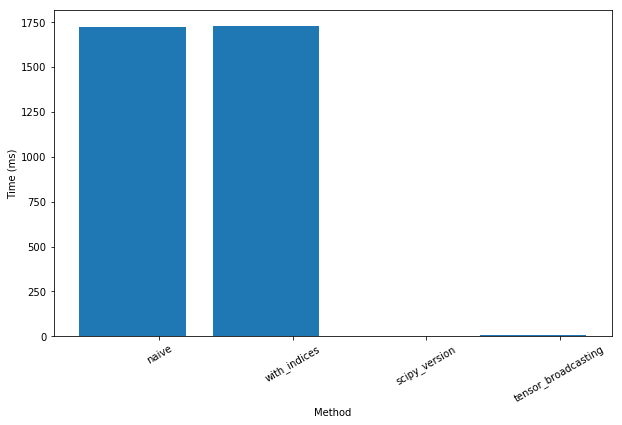

In [79]:
plt.figure(figsize=(10,6))
plt.bar(np.arange(len(methods)), [r.best*1000 for r in timers], log=False)  # Set log to True for logarithmic scale
plt.xticks(np.arange(len(methods))+0.2, [f.__name__ for f in methods], rotation=30)
plt.xlabel('Method')
plt.ylabel('Time (ms)')
plt.show()